## Let’s compare commit activity between weekdays and weekends

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect("../datasets/checking-logs.sqlite")

#### We will use the absolute numbers of commits and will compare them during working days and weekends.

In [4]:
sql = """
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
"""
df = pd.read_sql(sql, con, parse_dates='timestamp')
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date
df['day_of_week'] = df['timestamp'].dt.day_of_week
df['weekend'] = df['day_of_week'] >= 5 
print(df[~df['weekend']])
weekday_commits = (
    df[~df['weekend']].groupby(['date', 'hour']).size().reset_index(name='commits')
)
weekend_commits = (df[df['weekend']].groupby(['date', 'hour']).size().reset_index(name='commits')
)
#print(weekend_commits)
#print(weekday_commits)
abs_weekday = weekday_commits.groupby('hour')['commits'].sum().reset_index()
abs_weekend = weekend_commits.groupby('hour')['commits'].sum().reset_index()
all_hours = pd.DataFrame({'hour': range(24)})
abs_weekday = all_hours.merge(abs_weekday,how='left').fillna(0)
abs_weekend = all_hours.merge(abs_weekend, how='left').fillna(0)
print(abs_weekend)
print(abs_weekday)

                      timestamp  hour        date  day_of_week  weekend
0    2020-04-17 05:19:02.744528     5  2020-04-17            4    False
1    2020-04-17 05:22:35.249331     5  2020-04-17            4    False
2    2020-04-17 05:22:45.549397     5  2020-04-17            4    False
3    2020-04-17 05:34:14.691200     5  2020-04-17            4    False
4    2020-04-17 05:34:24.422370     5  2020-04-17            4    False
...                         ...   ...         ...          ...      ...
3202 2020-05-21 20:19:06.872761    20  2020-05-21            3    False
3203 2020-05-21 20:22:41.785725    20  2020-05-21            3    False
3204 2020-05-21 20:22:41.877806    20  2020-05-21            3    False
3205 2020-05-21 20:37:00.129678    20  2020-05-21            3    False
3206 2020-05-21 20:37:00.290491    20  2020-05-21            3    False

[2037 rows x 5 columns]
    hour  commits
0      0      6.0
1      1      6.0
2      2      0.0
3      3      1.0
4      4      0.0
5  

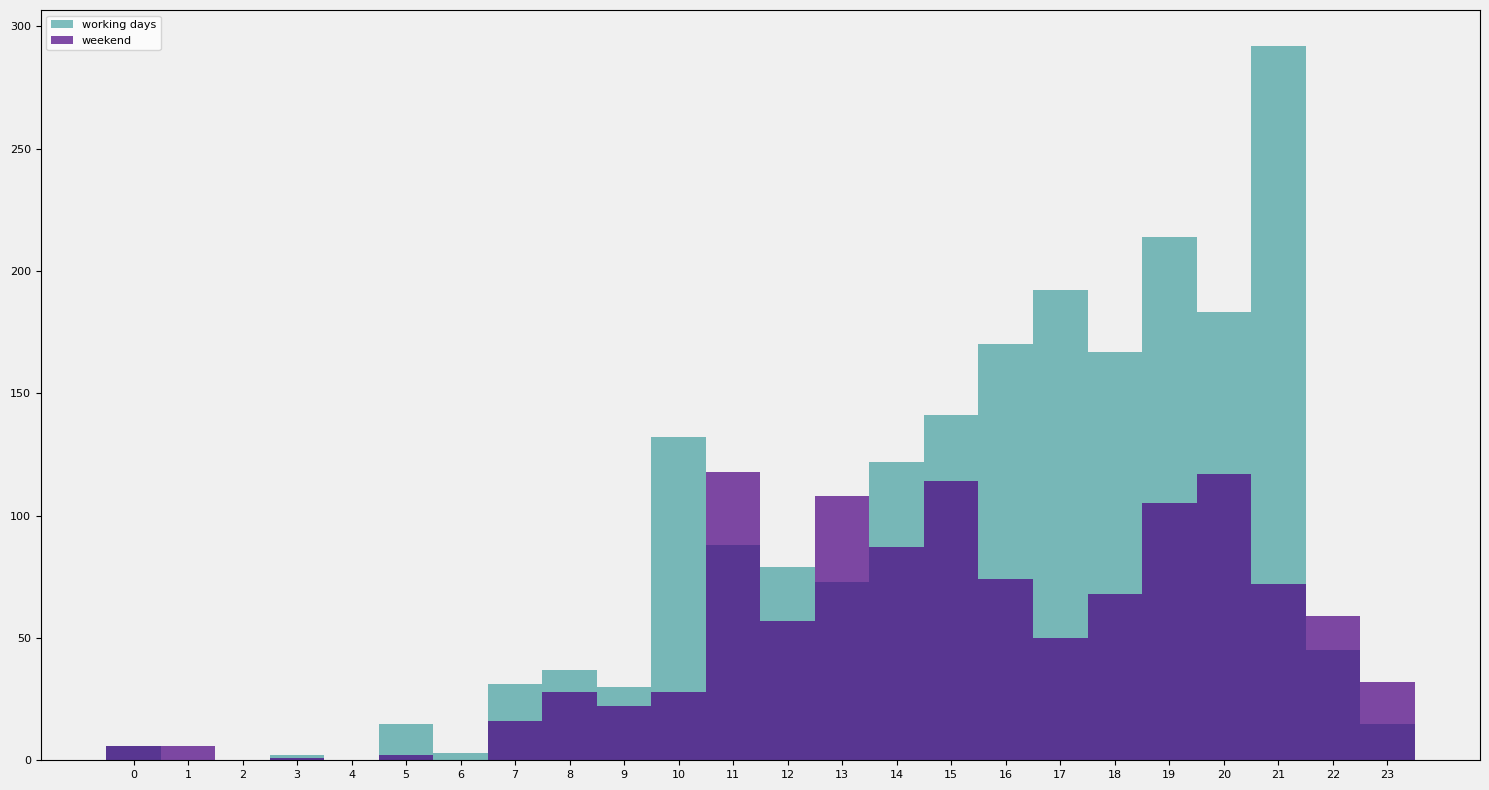

In [5]:
plt.figure(figsize=(15, 8))

plt.bar(
    abs_weekday['hour'], 
    abs_weekday['commits'],
    width=1,
    color='#008080',
    alpha=0.5,
    label='working days'
)
plt.bar(
    abs_weekend['hour'],  
    abs_weekend['commits'],
    color='#4B0082',
    alpha=0.7,
    width=1,
    label='weekend'
)

plt.xticks(range(24), fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

ax = plt.gca()
ax.set_facecolor('#f0f0f0')
plt.gcf().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### Are there hours when the total number of commits was higher on weekends than on working days? - Yes - 11, 13, 22, 23

In [6]:
con.close()